# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset::https://www.kaggle.com/datasets/mirichoi0218/insurance

Import the necessary libraries and create your dataframe(s).

In [44]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
# Implementation of matplotlib function
import matplotlib.pyplot as plt
import matplotlib.lines as lines
# read csv file
df = pd.read_csv("Medical_Cost_Insurance_MCI.csv")
#print(df.shape)
df.info() #print dataframe columns, no nullvalues, count, datatype of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Variables
charges: The total medical expenses charged to the insurance plan for the calendar year. Named expenses in the book.

age: An integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

sex: The policy holder's gender, either male or female.
bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
children: An integer indicating the number of children/dependents covered by the insurance plan.
smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
region: The beneficiary's place of residence in the US, divided into four geographic regions: northeast, southeast, southwest, or northwest.

In [4]:
df.shape

(1338, 7)

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [5]:
# looking for missing values in dataset
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}- {}%'.format(col,round(pct_missing*100)))
    print(df.shape)

age- 0%
(1338, 7)
sex- 0%
(1338, 7)
bmi- 0%
(1338, 7)
children- 0%
(1338, 7)
smoker- 0%
(1338, 7)
region- 0%
(1338, 7)
charges- 0%
(1338, 7)


(1338, 7)


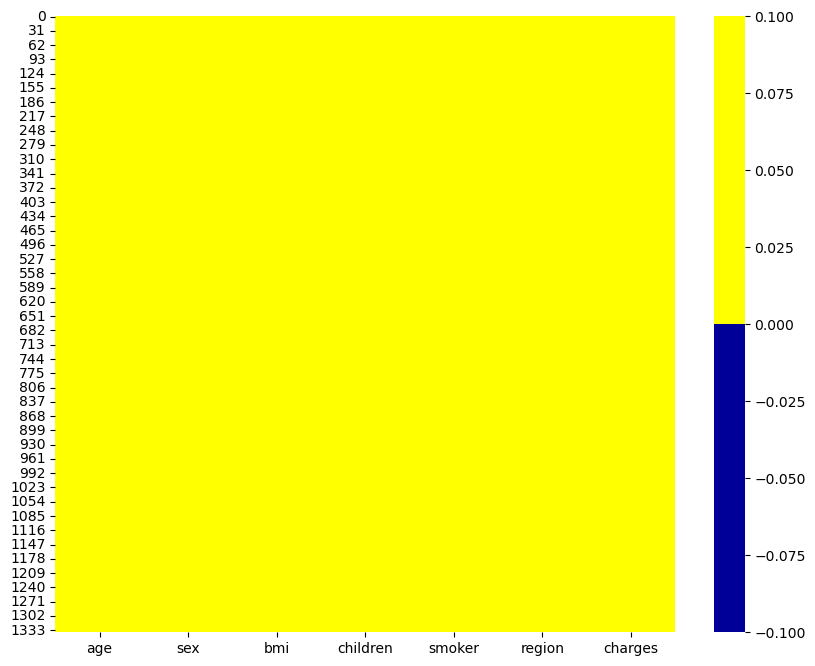

In [14]:
### showing missing value through heat msp
plt.figure(figsize=(10,8))

cols = df.columns[:10]#enter :20
colours = ['#000099','#ffff00'] # specify colours : yellow = missing etc
sns.heatmap(df[cols].isna(),cmap=sns.color_palette(colours))
print(df.shape)

Observation: there are no missing values in the dataset.

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [17]:
# knowing data types of given attributes in the dataset
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

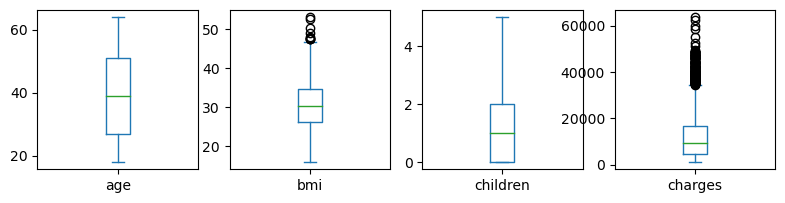

In [20]:
# 'looking for the outliners clearly i used box plot distribution across the dataset
# numerical columns
num_columns = ['Age', 'Children']
ax_array = df.plot(kind='box',subplots=True, figsize=(12,12), layout=(5,5))
plt.show()

Observations:I have found outliers in BMI and Charges columns.

In [45]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)

IQR_value = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR_value
upper_bound = Q3 + 1.5 * IQR_value

bmi_outliers_iqr = df[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

bmi_outliers_iqr


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [ ]:
I would like to see evry single column in Data for further analysis and its visualization. There is no 

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [ ]:
# remove the white spaces in columns
print(df.columns)
df.columns.str.strip()

In [ ]:
# remove the spaces in columns by '_'.
df.columns=df.columns.str.replace(' ', '_')
print(df.columns)

In [ ]:
# save cleaned dataset to a new csv
df.to_csv("mci_cleaned.csv", index=False)

In [ ]:
# Check to see that it worked
df_cleaned = pd.read_csv("mci_cleaned.csv")

# want to see if the dataframe was properly imported and see what kind of data is stored in each column
df_cleaned.info()
df_cleaned.head()

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? Yes. All types of data
2. Did the process of cleaning your data give you new insights into your dataset? yes I got my insights to find through this dataset
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? No